In [10]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import argparse
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs

train_file = open('train.data')
test_file = open('test.data')

epochs = 50
steps = 300000

In [11]:
d_train = []
d_label = []
train_file.seek(0)
for line in train_file:
    line = line.rstrip('\n')
    lc = line.split(', ')
    line_l = [lc[0], lc[2], lc[4], lc[10], lc[11], lc[12]]
    d_train.append(line_l)
    if (lc[14] == '<=50K'):
        d_label.append(0)
    else:
        d_label.append(1)
d_train = preprocessing.scale(d_train)
d_train = np.c_[d_train, d_label]
    
d_test = []
test_file.seek(0)
for line in test_file:
    line = line.rstrip('\n')
    lc = line.split(',')
    line_l = [lc[0], lc[2], lc[4], lc[10], lc[11], lc[12]]
    d_test.append(line_l)
d_test = preprocessing.scale(d_test)

d_train = np.array(d_train, dtype = float)
d_test = np.array(d_test, dtype = float)

In [12]:
print(d_train.shape)
print(d_test.shape)
# print(d_train[0:10])
# print(np.mean(d_train[:, 1:2]))

(43958, 7)
(4884, 6)


In [13]:
def activation(x):
    return 1.0/(1 + np.exp(-x))

In [ ]:
lrs = [1, 0.1, 0.01, 0.001]
# lrs = [0.5, 0.1]
epoch_counts = []
accuracy_plot = []
magnitude_plot = []
weights = []

for learning_rate in lrs:
    print('Start training... Alpha = %.4f' % learning_rate)
    weight = np.random.uniform(size = (len(d_train[0]) - 1))
    loss_history = []
    step_accu_history = []
    mag_history = []
    prev_mag = 1
    prev_loss = 1
    epoch_count = 0
    
    for epoch in range(epochs):
        if (epoch%10 == 0):
            print('Training epoch:', epoch, '~', epoch + 10, '...')
#             curr_mag = la.norm(weight)
#             if (epoch > 30 and (curr_mag - prev_mag) < 0.001):
#                 break
#             prev_mag = curr_mag
            
        epoch_loss = []
        np.random.shuffle(d_train)
        e_train = d_train[50:, 0:6]
        e_train_label = d_train[50:, 6:7].flatten()
        e_val = d_train[0:50, 0:6]
        e_val_label = d_train[0:50, 6:7].flatten()
        
        for step in range(steps):
            preds = activation(e_train.dot(weight))
            error = preds - e_train_label
            loss = np.sum(error**2)/len(e_train_label)
            epoch_loss.append(loss)
            gradient = e_train.T.dot(error)/e_train.shape[0]
            weight += -learning_rate*gradient
            
            if (step%30 == 0):
                preds_side = activation(e_val.dot(weight))
                error_side = abs(np.round(preds_side) - e_val_label)
                step_accu_history.append(1 - sum(error_side)/50)
                mag_history.append(la.norm(weight))
                
        epoch_count += 1
        loss_history.append(np.mean(epoch_loss))
    accuracy_plot.append(step_accu_history)
    magnitude_plot.append(mag_history)
        
    epoch_counts.append(epoch_count)
    weights.append(weight)
    print('Traning Complete.')
    
    fig = plt.figure()
    plt.plot(np.arange(0, len(loss_history)), loss_history)
    fig.suptitle('Training Loss Alpha = %.4f' % learning_rate)
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.show()
    fig = plt.figure()
    plt.plot(np.arange(0, len(step_accu_history)), step_accu_history)
    fig.suptitle('Training Loss Alpha = %.4f' % learning_rate)
    plt.xlabel("Steps #")
    plt.ylabel("Accuracy")
    plt.show()
    fig = plt.figure()
    plt.plot(np.arange(0, len(mag_history)), mag_history)
    fig.suptitle('Magnitude of Weight Alpha = %.4f' % learning_rate)
    plt.xlabel("Steps #")
    plt.ylabel("Magnitude")
    plt.show()
    
    
    



Start training... Alpha = 1.0000
Training epoch: 0 ~ 10 ...


In [ ]:
print(len(accuracy_plot[1]), len(magnitude_plot[1]))
fig = plt.figure()
for i in range(4):
    plt.plot(np.arange(0, len(accuracy_plot[i]))*30, accuracy_plot[i])
fig.suptitle('Training Accuracy')
plt.legend(['1', '1e-1', '1e-2', '1e-3'])
plt.xlabel("Steps #")
plt.ylabel("Accuracy")
plt.show()
fig = plt.figure()
for i in range(4):
    plt.plot(np.arange(0, len(magnitude_plot[i]))*30, magnitude_plot[i])
fig.suptitle('Magnitude of Weight')
plt.legend(['1', '1e-1', '1e-2', '1e-3'])
plt.xlabel("Steps #")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
print(weights)
with open('weight.txt', 'w') as f_weight:
    for weight in weights:
        for item in weight:
            f_weight.write("%s," % item)
        f_weight.write("\n")
        

In [20]:
weights_read = []
with open('weight.txt', 'r') as f_weight:
    for line in f_weight:
        line = line.rstrip(',\n')
        lc = line.split(',')
        weights_read.append(np.array(lc, dtype = float))

weights_read = np.array(weights_read)
preds_test = activation(d_test.dot(weights_read[0]))

In [21]:
import csv
res = [['Example', 'Label']]
ct = 0

for lb in preds_test:
    row = []
    row.append("'%s'" %ct)
    if (lb < 0.5):
        row.append('<=50K')
    else:
        row.append('>50K')
    res.append(row)
    ct += 1
with open("output3.csv",'w', newline='') as resultFile:
    wr = csv.writer(resultFile)
    wr.writerows(res)

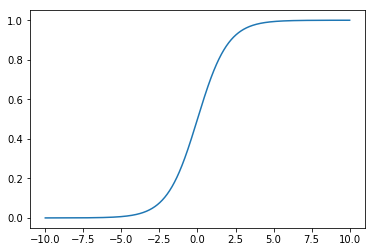

In [7]:
fig = plt.figure()
x = np.linspace(-10,10,1000)
plt.plot(x, 1.0/(1 + np.exp(-x)))

plt.show()